<div style="border:solid Chocolate 2px; padding: 40px">

<b>Елена, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование сервиса аренды самокатов GoFast

В наличие есть данные о некоторых пользователях сервиса аренды самокатов из нескольких городов, а также об их поездках. <br>**Необходимо:** проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
-	без подписки 
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra 
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно
    
**Имеющиеся данные:**
- Данные о пользователях сервиса (таблица users):
    - user_id - уникальный идентификатор пользователя
    - name - имя пользователя
    - age - возраст
    - city - город
    - subscription_type - тип подписки (free, ultra)
- Данные о поездках пользователей (таблица rides):
    - user_id - уникальный идентификатор пользователя
    - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    - date - дата совершения поездки
- Данные о типах подписки (таблица subscriptions):
    - subscription_type - тип подписки
    - minute_price - стоимость одной минуты поездки по данной подписке
    - start_ride_price - стоимость начала поездки
    - subscription_fee - стоимость ежемесячного платежа


**Содержание проекта:**
<br>[1  Шаг 1. Загрузка данных](#ref1)

<br>[2  Шаг 2. Предобработка данных](#ref2)
<br>[2.1  Приведем столбец rides['date'] к типу данных datetime.](#ref2.1)
<br>[2.2  Создадим новый столбец с номером месяца на основе столбца date.](#ref2.2)
<br>[2.3  Проверим таблицы на наличие пропущенных значений и дубликатов.](#ref2.3)

<br>[3  Шаг 3. Исследовательский анализ данных](#ref3)
<br>[3.1  Проанализируем частоту встречаемости городов.](#ref3.1)
<br>[3.2  Проанализируем соотношение пользователей с подпиской и без подписки.](#ref3.2)
<br>[3.3  Проанализируем возраст пользователей.](#ref3.3)

<br>[4  Шаг 4. Объединение данных](#ref4)
<br>[4.1  Объединим данные о пользователях, поездках и подписках.](#ref4.1)
<br>[4.2  Создайте ещё два датафрейма.](#ref4.2)
<br>[4.3  Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.](#ref4.3)

<br>[5  Шаг 5. Подсчёт выручки](#ref5)
<br>[5.1  Создадим датафрейм с агрегированными данными о поездках.](#ref5.1)
<br>[5.2  Добавим столбец с помесячной выручкой.](#ref5.2)


<br>[6  Шаг 6. Проверка гипотез](#ref6)
<br>[6.1  Тратят ли пользователи с подпиской больше времени на поездки?](#ref6.1)
<br>[6.2  Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку](#ref6.2)
<br>[6.3  Помесячная выручка от пользователей](#ref6.3)
<br>[6.4  Количество обращений в техподдержку](#ref6.4)

<br>[7  Шаг 7. Распределения](#ref7)
<br>[7.1  Акция с раздачей промокодов](#ref7.1)
<br>[7.2  Push-уведомления](#ref7.2)


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Супер, что начинаешь с введения! Если добавим еще описание данных, то будет идеально!

<div class="alert alert-info">
<b>Done 👍</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Замечательно!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Лайк, что испортируешь библиотеки в отдельной ячейке 

#### Шаг 1. Загрузка данных
<a id='ref1'></a>

Загрузим необходимые данные и изучим их.

In [2]:
users = pd.read_csv('/datasets/users_go.csv') #загрузим данные
users.info() #выведем общую информацию о датафрейме
users.head() #выведем первые несколько строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides = pd.read_csv('/datasets/rides_go.csv') #загрузим данные
rides.info() #выведем общую информацию о датафрейме
rides.head(3) #выведем первые несколько строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20


In [4]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') #загрузим данные
subscriptions.info() #выведем общую информацию о датафрейме
subscriptions.head(3) #выведем первые несколько строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Видим, что в представленных таблицах содержатся данные о пользователях, их поездках и их подпиcках. 
<br>Таблица пользователей и поездок могут быть соединены по полю user_id. 
<br>Таблица пользователей и подписок могут быть соединены по полю subscription_type. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Обзор данных выполнен корректно!

#### Шаг 2. Предобработка данных
<a id='ref2'></a>

**2.1 Приведем столбец rides['date'] к типу данных datetime.** <a id='ref2.1'></a>

In [5]:
rides['date'] = pd.to_datetime(
    rides['date'], format='%Y-%m-%d'
) 
rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно, дата должна быть датой

**2.2 Создадим новый столбец с номером месяца на основе столбца date.** <a id='ref2.2'></a>

In [6]:
rides['ride_month'] = rides['date'].dt.month
rides['ride_month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: ride_month, Length: 18068, dtype: int64

In [7]:
#rides['ride_month_year'] = str(rides['ride_month'])+"_"+str(rides['ride_year'])
# rides['ride_month_year'] = rides['date'].dt.month+'_'+rides['date'].dt.year
rides['ride_month_year'] = pd.to_datetime(rides['date']).dt.strftime('%Y-%m')
rides

,user_id,distance,duration,date,ride_month,ride_month_year
0,1,4409.919140,25.599769,2021-01-01,1,2021-01
1,1,2617.592153,15.816871,2021-01-18,1,2021-01
2,1,754.159807,6.232113,2021-04-20,4,2021-04
3,1,2694.783254,18.511000,2021-08-11,8,2021-08
4,1,4028.687306,26.265803,2021-08-28,8,2021-08
...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,2021-11
18064,1534,2840.423057,21.409799,2021-11-16,11,2021-11
18065,1534,3826.185507,18.435051,2021-11-18,11,2021-11
18066,1534,2902.308661,16.674362,2021-11-27,11,2021-11


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Вопрос - в задании просили добавить месяц, мы это сделали, но давай проверим за сколько лет данные мы имеем? Провести такую проверку важно, чтобы данные за несколько лет не склеились при агрегации по месяцам.
        

**2.3 Проверим таблицы на наличие пропущенных значений и дубликатов.** <a id='ref2.3'></a>

In [8]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
rides.isna().sum()

user_id            0
distance           0
duration           0
date               0
ride_month         0
ride_month_year    0
dtype: int64

In [10]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений в таблице нет. Проверим на явные и неявные дубликаты.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично, пропусков нет
    

In [11]:
users.duplicated().sum()

31

Видим, что в таблице users 31 дублирующаяся строчка. Так как у нас в таблице rides ссылка на user_id(значение которого в первой строке и в строке-дубликате одинаково), то удаление дубликатов не должно повлиять на ссылочную целостность между таблицами.
<br> Удалим дубликаты.

In [12]:
users.drop_duplicates().reset_index(drop=True)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [13]:
rides.duplicated().sum()

0

In [14]:
subscriptions.duplicated().sum()

0

В таблицах rides и subscriptions дубликатов также нет.

Проверим поле users['city'] на неявные дубликаты.

In [15]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов нет.

Проверим дополнительно, что в таблице rides нет ссылок на несуществующие в таблице users[user_id]

In [16]:
u_list=users['user_id'].unique()
rides.query('user_id not in @u_list')

,user_id,distance,duration,date,ride_month,ride_month_year


Таких случаев нет, можно переходить к исследовательскому анализу.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Дубликаты нашли и удалили!
    

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Давай сделаем небольшой вывод по обзору данных? 

Таким образом, на этапе преобработки данных были выявлены и решены следующие проблемы:
- столбец rides['date'] был типа objeсt, хотя содержал дату поездки. Преобразован в тип datetime
- для дальнейшего помесячного анализа пользователей с подпиской и без не хватало данных о годе и месяце поездки. На основе столбца rides['date'] были рассчитаны недостающие  столбцы rides['ride_month'] и rides['ride_year']
- в таблице users были обнаружены и удалены полные дубликаты строк (31 строка)
- пропуски в столбцах всех трех таблиц не обнаружены

<div class="alert alert-info">
<b>Done 👍</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошечно

#### Шаг 3. Исследовательский анализ данных
<a id='ref2'></a>

**3.1 Проанализируем частоту встречаемости городов.** <a id='ref3.1'></a>

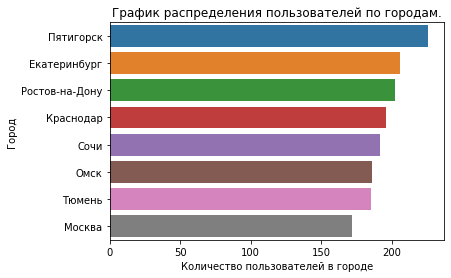

In [17]:
city_count = users.groupby(by='city').count().sort_values(by='user_id',ascending=False)
city_barplot = sns.barplot(data=city_count, x=city_count['user_id'], y = city_count.index, orient='h' )
city_barplot.set(xlabel='Количество пользователей в городе',
 ylabel='Город',
 title='График распределения пользователей по городам.')
plt.show()

Видим, что число пользователей больше всего в Пятигорске, а меньше всего - в Москве (возможно, там популярны другие сервисы). 
<br>Однако важно помнить, что диаграмма показывает только количество зарегистрированных пользователей, но не активность использования ими самокатов.


In [18]:
user_rides = users.join(rides, on='user_id', how='inner', rsuffix='_y')[['city','user_id','distance','duration']]
user_rides = user_rides.groupby(by=['city']).agg({'user_id':['count'],'distance':['sum'],'duration':['sum']})#
user_rides.columns = ['Пользователей','Суммарное расстояние','Суммарное время']
user_rides = user_rides.sort_values(by=['Пользователей'],ascending=False)
display(user_rides.style.background_gradient(cmap='Blues', axis=0))


,Пользователей,Суммарное расстояние,Суммарное время
city,,,
Пятигорск,226,706286.593578,4222.965999
Екатеринбург,206,642521.288587,3872.437717
Ростов-на-Дону,202,633373.286553,3798.613965
Краснодар,196,610472.745358,3600.137781
Сочи,192,597833.009783,3655.929538
Омск,186,572188.923165,3392.399366
Тюмень,185,573047.723181,3236.930120
Москва,172,539035.010165,3154.664520


По таблице видим, что все-таки в Пятигорске не только больше всего пользователей, но и проезжаемое ими расстояние (и затраченное время) тоже самое высокое среди всех городов. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> График рассмотрен верно. Вывод хорош!

**3.2 Проанализируем соотношение пользователей с подпиской и без подписки.** <a id='ref3.2'></a>

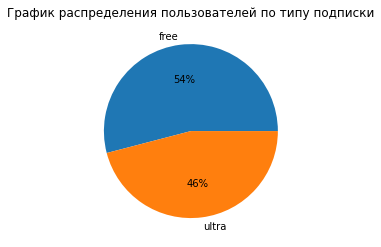

In [19]:
subscr_count = users.groupby(by='subscription_type').count().sort_values(by='user_id',ascending=False)
#subscr_count
#subscr_barplot = sns.barplot(data=subscr_count, x=subscr_count['user_id'], y = subscr_count.index, orient='h' )
# subscr_barplot.set(xlabel='Количество пользователей в категории',
#  ylabel='Тип подписки',
#  title='График распределения пользователей по типам подписки.')
labels = subscr_count.index
plt.pie(data=subscr_count, labels=labels, x=subscr_count['user_id'], autopct='%.0f%%')
plt.title('График распределения пользователей по типу подписки')
plt.show()

Видим, что количество пользователей с платной подпиской немного меньше, чем пользователей с бесплатной подпиской.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Тут лучше выбрать круговую диаграмму и посчитать соотношение категорий пользователей в процентах или долях от целого)

<div class="alert alert-info">
<b>Done 👍</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Так-то лучше!

**3.3 Проанализируем возраст пользователей.** <a id='ref3.3'></a>

Рассмотрим, какие данные по возрасту есть в таблице Users:

In [20]:
users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

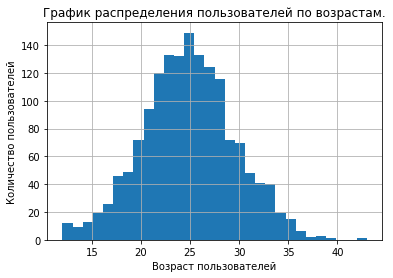

In [21]:
users['age'].hist(bins=30).set(xlabel='Возраст пользователей',
 ylabel='Количество пользователей',
 title='График распределения пользователей по возрастам.')
plt.show()

In [22]:
users['age'].describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

По гистограмме видно, что наибольшее количество пользователей приходится на возраст примерно 25 лет, именно в этом возрасте пользователи проявляют наибольший интерес (регистрируются на сервисе).
<br>При этом распределение практически симметричное, то есть повышение интереса к самокатам с возраста 12 до 25лет происходит также, как и снижение интереса в последующие 15лет (с 25 до 40лет).
<br>По описательной статистике видим, что медиана составляет 24года (что мы наблюдали на графике). При этом, квартили 25% и 75% равны 22 и 28годам соответственно. То есть, половина пользователей сервиса приходится именно на этот возраст.
<br> Возраст самого молодого пользователя сервиса - 12лет.
<br> Возраст самого старшего пользователя сервиса - 43 года.

**3.4 Проанализируем расстояние, которое пользователь преодолел за одну поездку.** <a id='ref3.4'></a>

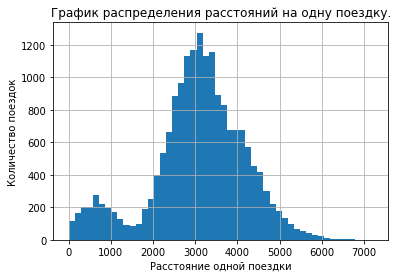

In [23]:
rides['distance'].hist(bins=50).set(xlabel='Расстояние одной поездки',
 ylabel='Количество поездок',
 title='График распределения расстояний на одну поездку.')
plt.show()

In [24]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Видим, что наиболее часто пользователи преодолевают за одну поездку около 3 км. 
<br>Также интересно, что есть и второй небольшой пик - около 600м, при этом поездки около 1,5км случаются редко.
<br>Возможно, пользователи, проезжающие в среднем 600м используют самокат чтобы побыстрее добраться до необходимой точки (до или от метро например), в то время как поездки длиной 3км являются развлекательными.
<br>По описательной статистике видим, что медиана составляет 3070м (что мы наблюдали на графике - пик в районе 3км.).
<br>Также видим, что половина всех поездок приходится на интервал 2,5-3,8км.
<br>Самая короткая зарегистрированная поездка - менее 1м, пользователь скорее всего просто разбирался как пользоваться сервисом.
<br>Самая длинна зарегистрированная поездка - менее 7,2км. Похоже, пользователю понравилось кататься :)

**3.5 Проанализируем продолжительность поездок.** <a id='ref3.5'></a>

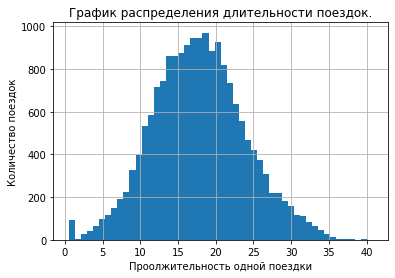

In [25]:
rides['duration'].hist(bins=50).set(xlabel='Проолжительность одной поездки',
 ylabel='Количество поездок',
 title='График распределения длительности поездок.')
plt.show()

In [26]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Видим, что чаще всего пользователи совершают поездки длиной 15-20 минут. 
<br>Интересно, что распределение отличается от распределения расстояний поездок - здесь не видно малого пика с левой стороны. Получается, что длительность поездки и расстояние не всегда связаны напрямую. Кто-то забирает самокат быстро и уверенно едет до необходимой точки, кто-то только пробует и затрачивает больше времени. Соответственно, скорость и время у всех разная, поэтому графики не повторяют друг друга.
<br>Однако виден небольшой пик в районе длительности 1-2мин - это скорее всего, попытки новых пользователей разобраться с процессом взятия самоката, либо ошибочно взятые самокаты, когда пользователь передумал.
<br>По описательной статистике видим, что медиана составляет 17мин - это наиболее среднее время использования самоката.
<br>Половина всех поездок приходится на 13-22мин.
<br>Самая короткая поездка - полминуты, как и в случае с расстоянием, пользователь скорее всего просто изучал сервис.
<br> Самая длинная поездка - 40мин. Возможно, это тот самый пользователь, который проехал 7км.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Все хорошо, но модно выводы сделать более подробными, если подкрепить их статистикой, рассмотрев метод describe()

<div class="alert alert-info">
<b>Done 👍</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Теперь идеально!

#### Шаг 4. Объединение данных
<a id='ref4'></a>

**4.1 Объединим данные о пользователях, поездках и подписках.** <a id='ref4.1'></a>  

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().
Чтобы захватить всех пользователей, используем параметр how='outer'.

In [27]:
maindf = users.merge(rides, on='user_id',how='outer').merge(subscriptions, on='subscription_type',how='left') 
maindf

,user_id,name,age,city,subscription_type,distance,duration,date,ride_month,ride_month_year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021-08,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18383,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021-11,8,50,0
18384,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021-11,8,50,0
18385,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021-11,8,50,0
18386,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021-11,8,50,0


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Объединение выполнено верно 

**4.2 Создайте ещё два датафрейма.** <a id='ref4.2'></a>

Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.


In [28]:
maindf_free = maindf.query('subscription_type=="free"')
maindf_ultra = maindf.query('subscription_type=="ultra"')
maindf_ultra.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,ride_month,ride_month_year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021-04,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021-08,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021-08,6,0,199


In [29]:
maindf_free.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,ride_month,ride_month_year,minute_price,start_ride_price,subscription_fee
6672,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021-01,8,50,0
6673,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021-02,8,50,0
6674,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021-02,8,50,0
6675,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021-02,8,50,0
6676,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021-02,8,50,0


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А рассморим еще и датафрейм free?
        

<div class="alert alert-info">
<b>Done 👍</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +

**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.** <a id='ref4.3'></a>

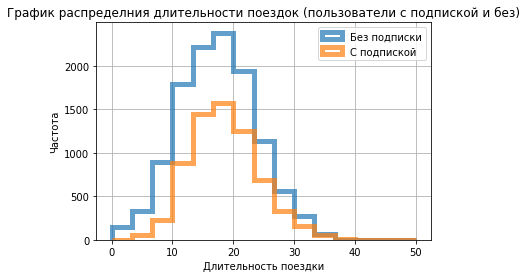

In [30]:
ax = maindf_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Без подписки'
)
maindf_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    grid=True,
    legend=True,
    title = 'График распределния длительности поездок (пользователи с подпиской и без)'
)
plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.show()

Видим, что в целом тренд идентичен с той лишь разницей, что пользователей с подпиской немного меньше, поэтому оранжевый график расположен ниже. Но поведение графиков идентично, поэтому можно сказать, что наличие подписки не влияет на время аренды самоката.

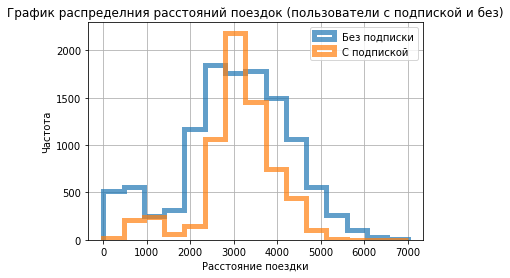

In [31]:
ax = maindf_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 7000),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='Без подписки'
)
maindf_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 7000),
    bins=15,
    linewidth=5,
    alpha=0.7,
    label='С подпиской',
    ax=ax,
    grid=True,
    legend=True,
    xlabel='Частота',
    title='График распределния расстояний поездок (пользователи с подпиской и без)'
) 
plt.xlabel('Расстояние поездки')
plt.ylabel('Частота')
plt.show()

Здесь видим, что графики также во многом повторяют друг друга, однако в районе 3км пользователи совершают гораздо больше поездок, нежели пользователи без подписки.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличнная работа! Молодец, что совместила графики, распределние наглядно и понятно!

#### Шаг 5. Подсчёт выручки
<a id='ref5'></a>

**5.1 Создадим датафрейм с агрегированными данными о поездках.** <a id='ref5.1'></a>

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [32]:
maindf_grouped = maindf.groupby(['user_id','ride_month_year'],as_index=False).agg({'duration':['count','sum'],'distance':'sum'})
maindf_grouped.columns = ['user_id','ride_month_year','rides_count','duration_sum','distance_sum']
maindf_grouped.head(15)

,user_id,ride_month_year,rides_count,duration_sum,distance_sum
0,1,2021-01,2,41.416640,7027.511294
1,1,2021-04,1,6.232113,754.159807
2,1,2021-08,2,44.776802,6723.470560
3,1,2021-10,2,31.578017,5809.911100
4,1,2021-11,3,53.397424,7003.499363
5,1,2021-12,2,27.203912,6751.629942
6,2,2021-03,3,60.959959,10187.723006
7,2,2021-04,2,39.048633,6164.381824
8,2,2021-06,1,13.851127,3255.338202
9,2,2021-07,2,46.170157,6780.722964


In [33]:
maindf_grouped.isna().sum()

user_id            0
ride_month_year    0
rides_count        0
duration_sum       0
distance_sum       0
dtype: int64

In [34]:
maindf_grouped[maindf_grouped['duration_sum'].isna()]

,user_id,ride_month_year,rides_count,duration_sum,distance_sum


In [35]:
maindf_grouped[maindf_grouped['user_id'].isna()]

,user_id,ride_month_year,rides_count,duration_sum,distance_sum


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Нужно ли нам проверить на пропуски сводную таблицу?

<div class="alert alert-info">
<b> Пропусков в таблице не видать.. Но на всякий переопределила выше метод merge с использованием outer, теперь выручка должна посчитаться правильно, т.к. теперь должны войти пользователи, которые оплатили подписку, но не ездили. Однако таких пользователей, похоже нет. 
<br> Или имелось ввиду, на пропуски месяцев в течение года?    
</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ты все правильно сделала) 

**5.2 Добавим столбец с помесячной выручкой.** <a id='ref5.2'></a>

Вспомним про стоимость тарифов:
-	без подписки 
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra 
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно

<br>Обозначим:
<br>cost_start_free, cost_start_ultra - стоимость старта
<br>cost_subsription_free, cost_subsription_ultra - стоимость абонемента(подписки)
<br>сost_minute_free, cost_minute_ultra - стоимость минуты
<br><br>Помесячная выручка считается по формуле: 
<br>(стоимость старта поездки × количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.

In [36]:
subscriptions.head(3) 

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Для начала добавим необходимые для рассчета данные в таблицу.

In [37]:
# cost_start_free = 50
# cost_start_ultra = 0
# cost_subsription_free = 0
# cost_subsription_ultra = 199
# сost_minute_free = 8
# cost_minute_ultra = 6

maindf_grouped['duration_sum']= np.ceil(maindf_grouped['duration_sum']) #округлим столбец

#функция определения типа подписки
def calc_subscriptin(row):
        return users.loc[users['user_id']==row['user_id'],'subscription_type'].any()
maindf_grouped['subscription_type'] = maindf_grouped.apply(calc_subscriptin, axis=1)

maindf_grouped = maindf_grouped.merge(subscriptions, on='subscription_type',how='left')
maindf_grouped.head(5)

,user_id,ride_month_year,rides_count,duration_sum,distance_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,2021-01,2,42.0,7027.511294,ultra,6,0,199
1,1,2021-04,1,7.0,754.159807,ultra,6,0,199
2,1,2021-08,2,45.0,6723.470560,ultra,6,0,199
3,1,2021-10,2,32.0,5809.911100,ultra,6,0,199
4,1,2021-11,3,54.0,7003.499363,ultra,6,0,199


Теперь можно считать выручку.

In [38]:
#функция рассчета месячной выручки с пользователя
def calc_ride_revenue(row):
    return row['rides_count']*row['start_ride_price'] + row['duration_sum']*row['minute_price']  + row['subscription_fee']

maindf_grouped['month_revenue'] = maindf_grouped.apply(calc_ride_revenue, axis=1)
maindf_grouped.head(5)

,user_id,ride_month_year,rides_count,duration_sum,distance_sum,subscription_type,minute_price,start_ride_price,subscription_fee,month_revenue
0,1,2021-01,2,42.0,7027.511294,ultra,6,0,199,451.0
1,1,2021-04,1,7.0,754.159807,ultra,6,0,199,241.0
2,1,2021-08,2,45.0,6723.470560,ultra,6,0,199,469.0
3,1,2021-10,2,32.0,5809.911100,ultra,6,0,199,391.0
4,1,2021-11,3,54.0,7003.499363,ultra,6,0,199,523.0


Выведем пользователя, по которому была самая большая месячная выручка за все время.

In [39]:
good_user = maindf_grouped[maindf_grouped['month_revenue']==maindf_grouped['month_revenue'].max()].merge(users, on='user_id', how='left') #sort_values(by='month_revenue'),ascending=False)
good_user
#display(maindf_grouped.style.background_gradient(cmap='Blues', axis=0))


,user_id,ride_month_year,rides_count,duration_sum,distance_sum,subscription_type_x,minute_price,start_ride_price,subscription_fee,month_revenue,name,age,city,subscription_type_y
0,829,2021-12,8,193.0,34583.31457,free,8,50,0,1944.0,Федор,29,Пятигорск,free
1,829,2021-12,8,193.0,34583.31457,free,8,50,0,1944.0,Федор,29,Пятигорск,free


И приз получает Федор из Пятигорска, 29лет, проехавший почти 35км за 8 поездок и затративший чуть больше 3 часов.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А округлить столбец с продолжительностью каждой поездки? 

<div class="alert alert-info">
<b> я его округляла в самом алгоритме расчета до этого, но не в исходной таблице maindf_grouped. Ок, округлила в таблице тоже)
</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  в итоговом датафрейме не хватает столбца с типом подписки, проверить правильность расчета выручки затруднительно

<div class="alert alert-info">
<b> Оки, добавила столбец и переделала алгоритм без хардкодных переменных (использовала данные из subscriptions).  Удалять  поля для рассчета не стала.
</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все замечания исправлены!

#### Шаг 6. Проверка гипотез
<a id='ref6'></a>

**6.1 Тратят ли пользователи с подпиской больше времени на поездки?** <a id='ref6.1'></a>

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки

Нулевая гипотеза: пользователи с подписков и без тратят одинаковое время на поездки
<br>Альтернативная гипотеза: пользователи без подписки тратят меньше времени

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно 

In [40]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

maindf_free_duration = maindf_free['duration']
maindf_ultra_duration = maindf_ultra['duration']

results = st.ttest_ind(maindf_free_duration, maindf_ultra_duration,alternative='less')

print('Среднее время (без подписки) :',round(maindf_free_duration.mean(),2))
print('Среднее время (с подпиской) :',round(maindf_ultra_duration.mean(),2))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее время (без подписки) : 17.39
Среднее время (с подпиской) : 18.53
p-значение: 1.6261032773552045e-34
Отвергаем нулевую гипотезу о равенстве средних


Так как нулевая гипотеза была отвергнута, то пользователи без подписки действительно в среднем тратят меньше времени на поездки. И даже если мы поставим уровень статистической значимости на 0,01, то нулевая гипотеза также будет отвергнута.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно!

**6.2 Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку** <a id='ref6.2'></a>

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130м
<br>Альтернативная гипотеза: среднее проезжаемое расстояние скорее всего превышает оптимальное значение

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Гипотезы сформулированы верно 

In [41]:
maindf_ultra_distance = maindf_ultra['distance']

interested_value = 3130 #оптимальное рассточние с точки зрения износа

alpha = 0.05 # укажите уровень статистической значимости

results = st.ttest_1samp(maindf_ultra_distance,interested_value,alternative='less') 

print('Среднее расстояние (с подпиской) :',round(maindf_ultra_distance.mean(),2))
print('p-значение:',results.pvalue ) # добавьте в аргумент p-value

if results.pvalue < alpha: # сравните полученный p-value и уровень значимости):
    print('Отвергаем нулевую гипотезу: среднее расстояние скорее всего превышает 3130м')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130м')

Среднее расстояние (с подпиской) : 3115.43
p-значение: 0.07754742644919703
Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130м


Уровень полученного p-value=8%, что говорит о том, что выборочное среднее находится в хвосте распределения, однако оно превышает уровень статистической значимости, а значит нельзя с увереностью говорить, что среднее проезжаемое расстояние меньше 3130м.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вновь успех!

**6.3 Помесячная выручка от пользователей** <a id='ref6.3'></a>

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [42]:
# def calc_subscriptin(row):
#         return users.loc[users['user_id']==row['user_id'],'subscription_type'].any()

# maindf_grouped['subscription_type'] = maindf_grouped.apply(calc_subscriptin, axis=1)
# maindf_grouped

Создадим отдельные датафреймы для пользователей с подпиской и без и проверим гипотезу.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> То, о чем говорил выше) 

Нулевая гипотеза: истинное среднее помесячной выручки двух выборок равно.
<br>Альтернативная гипотеза: помесячная выручка по пользователям без подписки меньше по пользователям с подпиской.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно.
    

In [43]:
maindf_free_revenue = maindf_grouped.query('subscription_type=="free"')['month_revenue']
maindf_ultra_revenue = maindf_grouped.query('subscription_type=="ultra"')['month_revenue']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(maindf_free_revenue, maindf_ultra_revenue, alternative='less')

print('Средняя выручка (без подписки) :',round(maindf_free_revenue.mean(),2))
print('Средняя выручка (с подпиской) :',round(maindf_ultra_revenue.mean(),2))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


Средняя выручка (без подписки) : 330.01
Средняя выручка (с подпиской) : 365.62
p-значение: 1.3600256840012913e-32
Отвергаем нулевую гипотезу о равенстве средних


Нулевая гипотеза отвергнута, значит, выручка по пользователям с подпиской действительно больше.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошечно

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Рекомендация ко всем гипотезам: Не забывай выводить средние оценки

<div class="alert alert-info">
<b> Done
</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Топ

**6.4 Количество обращений в техподдержку** <a id='ref6.4'></a>

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для решения данной задачи понадобился бы метод scipy.stats.ttest_rel для проверки гипотезы о равенстве двух средних для зависимых(парных) выборок, так как анализируется одна и та же совокупность данных до изменений и после.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> В точку!

#### Шаг 7. Распределения
<a id='ref7'></a>

**7.1 Акция с раздачей промокодов** <a id='ref7.1'></a>

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.


Необходимо использовать биномиальное распределение с параметром вероятности успеха p=0.1. 
<br>Далее подобрать такое минимальное количество N, при котором биномиальное распределение будет аппроксимироваться к нормальному, и при этом значение Percent Point Function для вероятности 95% будет не менее 100, т.е. мы получим не менее 100 успехов (пользователей, продливших подписку).

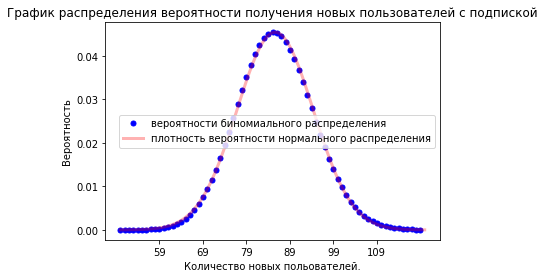

Условие аппроксимации выполняется
100.03728048156961


In [44]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 856
p = 0.1

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 10))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.title('График распределения вероятности получения новых пользователей с подпиской')
plt.ylabel('Вероятность')
plt.xlabel('Количество новых польователей.')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется')
else:
    print('Условие аппроксимации не выполняется')
    
norm_distr = st.norm(mu, sigma) 

result = norm_distr.ppf(0.95)
print(result)


Мы построили биномиальное распределение, аппроксимировали его к нормальному и подобрали минимальное количество N,чтобы функция ppf выдала значение 100.
Минимальное N равно 856, т.е. необходимо выдать не менее 856 промокодов, чтобы получить 100 новых пользователей с подпиской.

**7.2 Push-уведомления** <a id='ref7.2'></a>

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 11 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что пуш-уведомления откроют менее 399,5тыс пользователей: 0.0 %


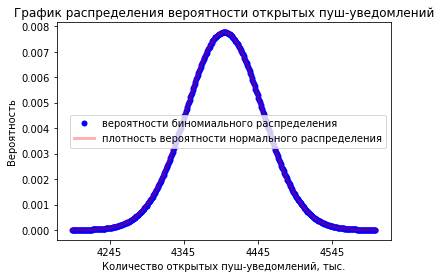

In [45]:
# задаём параметры 
n = 11000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

interested_value = 399500

result = distr.cdf(interested_value)
print('Вероятность того, что пуш-уведомления откроют менее 399,5тыс пользователей:',result,'%')

############### рисуем примерные графики
n = 11000  ##уменьшим значение до тысяч
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятности биномиального распределения')

# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 11000)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 100))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.title('График распределения вероятности открытых пуш-уведомлений')
plt.ylabel('Вероятность')
plt.xlabel('Количество открытых пуш-уведомлений, тыс.')
plt.show()


Вероятность того пуш-уведомления откроют не более 399,5 стремится к 0%.
<br> Также видим, что матожидание примерно равно 4400тыс(n*p=11000000 * 0.4), т.е. 4,4млн новых пользователей, поэтому действительно веротяность получить не более 399,5тыс. крайне мала.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличная работа! Вопросов нет) 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Сделаем вывод по проделанной работе?

**Итоговый вывод по проекту:**
У на имелись данные по пользователям, их поездкам и подпискам сервиса проката самокатов GoFast.
<br><br>**Этап предобработки данных:**
На этапе предобработки данных были выявлены и решены следующие проблемы:
- столбец rides['date'] был типа objeсt, хотя содержал дату поездки. Преобразован в тип datetime
- для дальнейшего помесячного анализа пользователей с подпиской и без не хватало данных о годе и месяце поездки. На основе столбца rides['date'] были рассчитаны недостающие  столбцы rides['ride_month'] и rides['ride_year']
- в таблице users были обнаружены и удалены полные дубликаты строк (31 строка)
- пропуски в столбцах всех трех таблиц не обнаружены

<br><br>**Исследовательский анализ данных:**
<br>На этапе исследовательского анализа было выявлено:
- наибольшее число пользователей (а также наибольшее суммарное расстояние и время) в городе Пятигорске. Второе и третье место занимают города Екатеринбург и Ростов-на-Дону
- пользователей с подпиской - 46%, без подписки - 54% от общего числа. 
- Медиана по возрасту пользователей составляет 24года. При этом, половина пользователей сервиса приходится на возраст 22-28лет. Возраст самого молодого пользователя сервиса - 12лет. Возраст самого старшего пользователя сервиса - 43 года. Повышение интереса к самокатам с возраста 12 до 25лет происходит также, как и снижение интереса в последующие 15лет (с 25 до 40лет).
- Медиана по расстояния составляет 3070м. Половина всех поездок приходится на интервал 2,5-3,8км. Самая короткая зарегистрированная поездка - менее 1м. Самая длинна зарегистрированная поездка - менее 7,2км. 
- Медиана по длительности поездки составляет 17мин - это наиболее среднее время использования самоката. Половина всех поездок приходится на 13-22мин. Самая короткая поездка - полминуты, как и в случае с расстоянием, пользователь скорее всего просто изучал сервис.  Самая длинная поездка - 40мин. Возможно, это тот самый пользователь, который проехал 7км.
- Наличие подписки не влияет на время аренды самоката - поведение пользователей идентично. Учитывая также, что соотношение  пользователей с подпиской и без близко к 50\50, можно сказать, что условия одинаково выгодны и по подписке и без нее.
- Пользователи с подпиской гораздо чаще проезжают расстояние в районе 3км нежели пользователи без подписки. 
- Наибольшая выручка, которую принес пользователь в месяц - 1944 рубля. 

<br><br>**Проверка гипотез:**
<br>Было проверено несколько гипотез:
<br>**1) Тратят ли пользователи с подпиской больше времени на поездки?**
<br>Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130м
<br>Альтернативная гипотеза: среднее проезжаемое расстояние скорее всего превышает оптимальное значение
<br>**Вывод:** 
<br> Пользователи без подписки действительно в среднем тратят меньше времени на поездки. 
<br>**2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**
<br>Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130м
<br>Альтернативная гипотеза: среднее проезжаемое расстояние скорее всего превышает оптимальное значение
<br>**Вывод:** 
<br>Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130м
<br>Альтернативная гипотеза: среднее проезжаемое расстояние скорее всего превышает оптимальное значение
<br>Среднее проезжаемое расстояние для пользователей с подпиской : 3115.43м
Однако не получилось отвергнуть нулевую гипотезу и нельзя с увереностью говорить, что среднее проезжаемое расстояние меньше 3130м, так как выбранный уровень статистической значимости позволяет говорить о том, что нам случайно попалась выборка со средним немного меньше, чем 3130м.
<br>**3) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**
<br>Нулевая гипотеза: истинное среднее помесячной выручки двух выборок равно.
<br>Альтернативная гипотеза: помесячная выручка по пользователям без подписки меньше по пользователям с подпиской.
<br>**Вывод:** 
<br>Средняя выручка (без подписки) : 330.01
<br>Средняя выручка (с подпиской) : 365.62
<br>Нулевая гипотеза отвергнута, значит, выручка по пользователям с подпиской действительно больше.

<br><br>**Также дополнительно рассмотрели случаи:**
<br>**1) По отделу маркетинга, который собирается запускать акцию с раздачей промокодов**
<br>Выяснили, что при заданных условиях акции необходимо разослать не менее 856 промокодов.
<br>**1) По отделу маркетинга, который собирается запускать push-уведомления:**
<br>Выяснили, что при заданных условиях уведомления скорее откроют 4,4млн полбзователей, а вто время как вероятность, что их откроют 399,4 тыс. пользователей стремится к нулю.


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вывод отражает проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Елена, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большая молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Не округлен столбец с продолжительностью поездки
    
    2. Нет итогового вывода
    
    
**Удачи и жду твой проект на повторное ревью!**

<div class="alert alert-info">
<b> Спасибо за подробные комментарии! Постаралась все учесть.
</b> 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Елена, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!
    